# Webscraping the Questions & Tags from `Stack exchange`

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests

## Webscraping Questions

### Required Pages:
https://astronomy.stackexchange.com/questions?tab=newest&pagesize=50  
https://astronomy.stackexchange.com/questions?tab=newest&page=2  
.  
.  
.  
.  
https://astronomy.stackexchange.com/questions?tab=newest&page=195  

In [24]:
pages=[]
pages.append("https://astronomy.stackexchange.com/questions?tab=newest&pagesize=50")

for i in list(range(2, 196)):
  pages.append('https://astronomy.stackexchange.com/questions?tab=newest&page='+str(i))


#pages

In [25]:
Questions=[]

for i in pages:
  page = requests.get(i)
  soup = BeautifulSoup(page.text, 'html.parser')

  question_name_list = soup.find_all('h3')
  for question in question_name_list:
    if question.find('a'):
      Questions.append(question.find('a').text)

Questions=Questions[2:]
print(Questions)



['Is the angular size of the black hole in the movie “interstellar” completely overblown?', 'Do apparent magnitude (V) and photometric magnitude (specifically in optical V band between 500-600 nm) have a similar scale to stellar magnitude?', 'Is there a public record of planetary disks apart from ours?', 'Why this happens?', 'How likely are planets to form after neutron star collisions?', 'Historical Lunar Tables and the Associated Error Bound', 'Why the habitable zone of a binary star is a disc and not a sphere?', 'Limit Magnitude divide 2 arcsec', 'If an object 1 billion light years away emits light, does it take more than 1 billion years to reach us because of the expansion of the universe?', 'photon gas pressure and Independence on refraction index', 'What is a UBV source for stars or stellar objects?', "Is there any relationship between planet's rotational velocity and distance of planet from sun?", 'Pink and green lights [closed]', 'How will they know when to start taking the pic

In [26]:
len(Questions)

10093

In [27]:
Questions[-1] #last question

'How do I calculate the inclination of an object with an amateur telescope?'

## Webscraping Tags

In [28]:
import re
from bs4 import BeautifulSoup

In [30]:
def listToString(s):
  # initialize an empty string 
  str1 = ""  
    
  # traverse in the string   
  for ele in s:  
      str1 += ele   
    
  # return string   
  return str1 


tag=[]

for i in pages:
  page = requests.get(i)
  soup = BeautifulSoup(page.text, 'html.parser')

  Tags=[]

  for div in soup.find_all('div', {"class": re.compile("^tags")}):      
    Tags.append(div.get('class')[1:])



  tagss=[]

  for j in Tags:
    tagss.append(listToString(j).replace('t-','|'))



  for k in tagss:
    tag.append(k[1:])
tag

['black-hole|supermassive-black-hole|angular-diameter',
 'star|galaxy|astrophysics|cosmology|universe',
 'exoplanet',
 'the-sun|the-moon',
 'neutron-star|planetary-formation|collision',
 'nigh|sky|celestial-mechanics|moon-phases',
 'habitable-zone|astrobiology',
 'observational-astronomy|magnitude|image-processing',
 'observational-astronomy|cosmology|expansion|gravitational-waves',
 'astrophysics|stellar-astrophysics',
 'star|astrophysics|cosmology|universe|coordinate',
 'planet|rotation|celestial-mechanics|mathematics|velocity',
 'light|identify-this-object',
 'radio-astronomy|photography|accretion-discs|even|horizon-telescope|sagittarius-a',
 'ligh|curve|tess|fits',
 'radio-astronomy|supermassive-black-hole|even|horizon-telescope|image-processing',
 'black-hole|neutron-star|accretion-discs|x-ray',
 'cosmology|cosmological-horizon',
 'earth|ecliptic',
 'black-hole|milky-way|m87',
 'galaxy|mass',
 'solar-eclipse|apparen|magnitude|magnitude|brightness',
 'telescope|deep-sky-observing',

In [31]:
len(tag)

9705

In [32]:
tag[-1]

'inclination|amateur-observing'

In [33]:
df = pd.DataFrame(list(zip(tag, Questions)), columns =['Tags', 'Questions']) 
df.head() 

,Tags,Questions
0,black-hole|supermassive-black-hole|angular-dia...,Is the angular size of the black hole in the m...
1,star|galaxy|astrophysics|cosmology|universe,Do apparent magnitude (V) and photometric magn...
2,exoplanet,Is there a public record of planetary disks ap...
3,the-sun|the-moon,Why this happens?
4,neutron-star|planetary-formation|collision,How likely are planets to form after neutron s...


In [34]:
df.shape

(9705, 2)

# Wordcloud for `Tags`

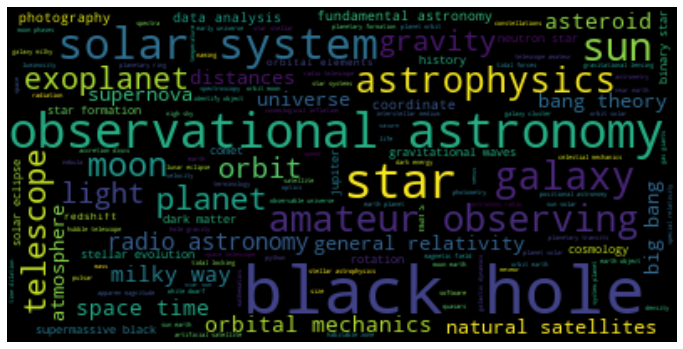

In [35]:
# get a list of the words in all Types, initialise a dictionary to zero values for each word
vocab = []
for Tags in df['Tags']:
    vocab.append(Tags)

vocab=', '.join(vocab)
#print(vocab)




from wordcloud import WordCloud 

# Start with one review:
text = vocab

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.subplots(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Making label column as per requirement for input to the fasttext module.

In [36]:
df["Tags"] = [item.replace("|", " __label__") for item in df["Tags"]]
df['Tags'] ='__label__' + df['Tags'].astype(str)

#columns_titles = ["Tags","Questions"]
#df=df.reindex(columns=columns_titles)

df.head()

,Tags,Questions
0,__label__black-hole __label__supermassive-blac...,Is the angular size of the black hole in the m...
1,__label__star __label__galaxy __label__astroph...,Do apparent magnitude (V) and photometric magn...
2,__label__exoplanet,Is there a public record of planetary disks ap...
3,__label__the-sun __label__the-moon,Why this happens?
4,__label__neutron-star __label__planetary-forma...,How likely are planets to form after neutron s...


In [37]:
df.shape

(9705, 2)